# Библиотека SciPy

Библиотека ``scipy`` обладает большим функционалом для работы с данными (<a href='https://docs.scipy.org/doc/scipy/reference/'>документация</a>, <a href='https://scipy-lectures.org/'>полезный набор примеров</a>). 

Из основных модулей хочется выделить следующие:


| модуль|функционал|
|---|---|
| ``scipy.linalg``      | Linear algebra |
|``scipy.integrate`` | Integration and ODEs |
|``scipy.optimize``| Optimization and root finding|
|``scipy.interpolate`` |Interpolation|
|``scipy.fft`` | Discrete Fourier transforms|
|``scipy.stats`` | Statistical functions|


**Важно:** Документация расчитана на подготовленного читателя и для работы со многими модулями необходимо понимать хотя бы на базовом уровне как реализуются те, или иные методы.

В данной лекции приведен лишь обзор некоторых реализованных в библиотеки функций. Более подробнее можно почитать в <a href='https://docs.scipy.org/doc/scipy/reference/tutorial/index.html'>туториалах scipy</a>. 

Рассмотрим пример использования библиотеки для простейшей линейной регресии ``scipy.stats.linregress``

In [1]:
import numpy as np
import matplotlib.pyplot as plt

LinregressResult(slope=2.0120484283981086, intercept=-3.080383665663901, rvalue=0.9980439003977739, pvalue=3.953703901084055e-23, stderr=0.02970643441942163)


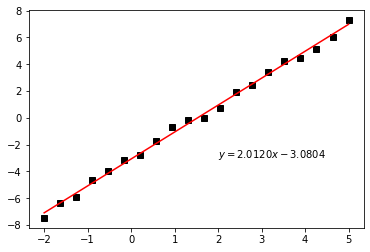

In [2]:
from scipy import stats

#создаем линию
x = np.linspace(-2,5,20)
y = 2*x -3

#добавляем шум
y += np.random.random(20) - 0.5
plt.plot(x,y, 'ks')

#делаем линейную регрессию
result = stats.linregress(x,y)

#выводим результат
print(result)

#получаем параметры прямой
a=result.slope
b=result.intercept
plt.text(2,-3,'$y = {:.4f} x {:+.4f}$'.format(a,b))

#строим прямую
fitted_y= result.slope*x +result.intercept
plt.plot(x,fitted_y,'r-')

plt.show()

## Линейная алгебра (``scipy.linalg``)

Примеры работы с данным модулем приводились ранее в разделе про NumPy. Хочется лишь еще раз отметить, что функционал ``scipy.linalg`` значительно обширнее одноименного модуля ``numpy``.

# Интегрирование и работа с обыкновенными дифференциальными уравнениями (``scipy.integrate``)

## Интегрирование функций

Для интегрирования функций можно выделить несколько простых методов модуля ``scipy.integrate`` (их как обычно больше. Читайте документацию перед выбором метода для каждой конкретной задачи!):

``quad(func, a, b[, args, full_output, …])`` - Compute a definite integral

``dblquad(func, a, b, gfun, hfun[, args, …])`` - Compute a double integral.

``tplquad(func, a, b, gfun, hfun, qfun, rfun)`` - Compute a triple (definite) integral.

``nquad(func, ranges[, args, opts, full_output])`` - Integration over multiple variables.

Рассмотрим несколько примеров их использования. Проинтегрируем функцию $\int_0^1 x^2 dx = \frac{x^3}{3}\biggr\rvert_{0}^1 = \frac{1}{3} $

In [5]:
from scipy import integrate

#задаем функцию x2, которая возвращает x**2. 
#тоже можно через def x2(x):...
x2 = lambda x: x**2

res, err = integrate.quad(x2, 0,1)
print(res)
print(abs(res-1/3), err)

0.33333333333333337
5.551115123125783e-17 3.700743415417189e-15


сделаем тоже для $\iint x^2 +y^2 dx dy =  \frac{2}{3} $. 

Для этого используем ``dblquad(func, a, b, gfun, hfun[, args, …])``

пределы по $y$ передаются через функции ``y = gfun(x)..hfun(x)``. Такой подход может быть удобен в случае, если нужно проинтегрировать в виде $\int_0^{1} dy \int_0^y f(x,y) dx$

In [8]:
x2_y2 = lambda x,y : x**2 + y**2

res, err = integrate.dblquad(x2_y2, 0, 1, lambda x: 0, lambda x: 1)
print(res)
print(abs(res-2/3), err)

0.6666666666666669
2.220446049250313e-16 1.4754810833321613e-14


``nquad`` выполняет ``quad`` несколько раз. Пределы передаются в видет итерируемого объекта (например списка). Где каждый элемент является либо функцией, возвращающей значения в виде пары элементов, либо просто итерируемым объектом длины 2. 

# Интегрирование по заданному набору точек

Проводит интегрирование значений $f_k = f(x_k)$ для заданного набора значений $f$ и $x$. 

Рассмотрим два примера такого интегрирования. С остальными методами рекомендуется ознакомиться самостоятельно:

``trapz(y[, x, dx, axis])`` - Integrate along the given axis using the composite trapezoidal rule.

``simps(y[, x, dx, axis, even])`` - Integrate y(x) using samples along the given axis and the composite Simpson’s rule.

Если у нас есть набор из $N$ точек $f(x)$, то определенный интеграл можно рассчитать следующим образом:

$\int_a^b f(x) dx \approx \sum_{k=1}^{N} \frac{f(x_{k-1}) + f(x_{k})}{2} \Delta x$

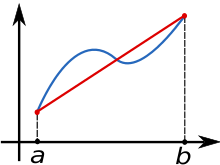
*картинка с wikipedia.org*

У такого метода довольно высокая ошибка. Для того чтобы ее уменьшить, можно рассматривать точки не парами, а тройками, интреполируя значение функции между ними квадратичной функцией. Такой подход обладает намного более высокой точностью и называется методом Симпсона:

$\int_a^b f(x) dx  \approx \frac{\Delta x}{3} \sum_{j=1}^{n/2}\bigg[f(x_{2j-2})+4f(x_{2j-1})+f(x_{2j})\bigg]$


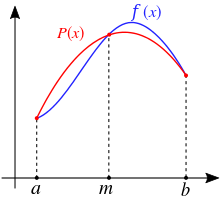
*картинка с wikipedia.org*

Рассмотрим примеры их работы для интеграла $\int_0^\pi sin(x) dx = 2$

In [16]:
x = np.linspace(0, np.pi, 5)
y = np.sin(x)

print('Метод трапеций: {}'.format(integrate.trapz(y, x=x)))
print('Метод Симпсона: {}'.format(integrate.simps(y, x=x)))

Метод трапеций: 1.8961188979370398
Метод Симпсона: 2.0045597549844207


## Интегрирование ОДУ

Модуль ``scipy.integrate`` позволяет решить задачу Коши: 

$\left\{\begin{array}{lcl}\frac{dy}{dx} &=& f(x,y) \\ y(x_0) &=& y_0\end{array}\right.$

Для построения схемы интегрирования функцию $f(x,y)$ в каждой точке раскладывают в ряд Тейлора, что приводит к следующему результату:

$y(x_{k+1}) = y(x_k) + y'(x_k)\Delta x + y''(x_k)\frac{\Delta x^2}{2} + ...$

Учет лишь первых двух слагаемых является простейшим подходом для решения данной задачи и называется методом Эйлера. В данном модуле он в явном виде не реализован. Приблизительный учет членов более высокого порядка приводит к серии методов **Рунге-Кутты**, которые являются стандартными в модуле ``scipy.integrate``.

В базовой функции для интегрирования ОДУ применяется ``scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)``

Расмотрим пример использования данного модуля $y' = \sin(t)$.

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 3.53314302e+00, 6.03426368e+00,
       8.29799322e+00, 1.00000000e+01])
 t_events: None
        y: array([[-1.        , -1.        , -0.9999994 , -0.9999384 , -0.99383474,
        -0.44367774,  0.92423617, -0.96878542,  0.42963013,  0.83916286]])
 y_events: None


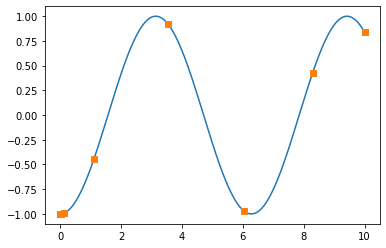

In [47]:
def y(t, y):
    return np.sin(t)
res= integrate.solve_ivp(y, 
                          (0,10), #пределы интегрирования t_span
                          [-1],)  # y0
                          #t_eval=list(range(11)))  #точки которые хотим получить на выходе
print(res)
plt.plot(np.linspace(0,10,200),-np.cos(np.linspace(0,10,200)),  '-')
plt.plot(res.t, res.y[0],  's')
plt.show()

Строим график для модели Лотки — Вольтерра (хищник - жертва) 

$\left\{\begin{array}{lcl}y_0' &=& (2-y_1)y_0 \\ y_1' &=& (-2 + y_0)y_1\end{array}\right.$

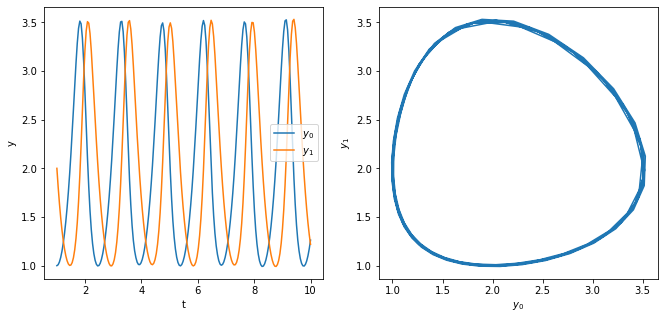

In [86]:
def y(t, y):
    d0=(2-y[1])*y[0]
    d1=(-2 + y[0])*y[1]
    return [d0,d1]
res= integrate.solve_ivp(y, 
                          (0,20), 
                          [1,2],
                        t_eval=np.linspace(0,20,200)) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

ax[0].plot(np.linspace(1,10,200),res.y[0], label='$y_0$')
ax[0].plot(np.linspace(1,10,200),res.y[1], label='$y_1$')
ax[0].legend()
ax[0].set_xlabel('t')
ax[0].set_ylabel('y')


ax[1].plot(res.y[0],res.y[1])
ax[1].set_xlabel('$y_0$')
ax[1].set_ylabel('$y_1$')

plt.show()

#  Фитирование кривых, нахождение минимума функции, решение уравнений с ``scipy.optimize``

## Фитирование кривых

Для простого фитирования кривых подходит метод ``scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=- inf, inf, method=None, jac=None, **kwargs)``

``f`` **callable**  The model function, ``f(x, …)``. It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.

``xdata`` **array_like or object** The independent variable where the data is measured. Should usually be an M-length sequence or an (k,M)-shaped array for functions with k predictors, but can actually be any object.

``ydata`` **array_like** The dependent data, a length M array - nominally ``f(xdata, ...)``.

``p0`` **array_like, *optional*** Initial guess for the parameters (length N). If ``None``, then the initial values will all be 1 (if the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).

``bounds`` **2-tuple of array_like, *optional*** Lower and upper bounds on independent variables. Defaults to no bounds. Each array must match the size of ``x0`` or be a scalar, in the latter case a bound will be the same for all variables. Use ``np.inf`` with an appropriate sign to disable bounds on all or some variables.

Рассмотрим пример фитирования кривой вида $y(t) = A -B \exp(-k t) $:

[2.04170899 1.9145262  0.08003846]


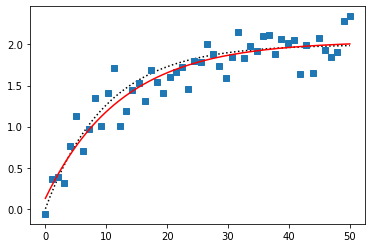

In [3]:
from scipy import optimize
# задаем функцию
def f(t, a, b,k):
    return a-b*np.exp(-k*t)
# строим исходную функцию
t=np.linspace(0,50,200)
plt.plot(t,f(t, 2, 2, 0.1), 'k:', label='original data')

# генерируем шумные данные
t=np.linspace(0,50,50)
ydata = f(t, 2, 2, 0.1) + 0.2*(np.random.randn(len(t)))
plt.plot(t,ydata, 's')

#фитируем
popt, pcov = optimize.curve_fit(f, t, ydata)
print(popt)

# строим оптимизированную функцию
t=np.linspace(0,50,200)
plt.plot(t,f(t, *popt), 'r-', label='optimized data')

plt.show()

## Минимизация функции

В некоторых случаях вам может потребоваться найти минимум или максимум какой-либо функции. Иногда, это приходится делать так как метод ``scipy.optimize.curve_fit`` не справляется с поставленной задачей. В функции ``scipy.optimize.minize`` реализованно огромное количество методов поиска локального минимума. 

Простейший метод поиска минимума функции является следование против градиента (градиентный спуск), где положение минимума значения функции $F(x)$ находится последовательным приближением к нему. Каждое последующее значение $x_{j+1}$ задается следующим образом: 

$\vec{x_{j+1}} = \vec{x_{j}} - \lambda_j \nabla F (\vec{x_j})$, 

где $\lambda$ - скорость спуска. В простейшем случае $\lambda=\textrm{const}$, в более продвинутых модификациях $\lambda$ выбирается исходя из скорости изменения функции. Данный метод приведен тут для примера, т.к. не требует больших познаний в математике для понимания того, как он работает. Более продвинутые методы работаю схожим образом, однако, выбор направления и шага происходит более сложным образом, в т.ч. с учетом и $j-2$ шага, что позволяет достичь большей точности и лучшей сходимости.

**Все эти методы не гарантируют нахождения глобального минимума функции, а стремяться лишь к локальному.** Для поиска глобальных минимумов можно использовать <a href='https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization'>другие функции</a>, однако, зачастую они требуют колоссальных вычислительных ресурсов.


**Важно**: Если минимизация проходит медленно или не сходится, попробуйте проварьировать шаг дифференцирования или использовать другой метод.

Рассмотрим пример использования данной функции для поиска минимума функции $(x-2)^2 + y^2$.

In [28]:
# задаем функцию
def func(var, args):
    x,y=var
    print(x,y)  #иногда полезно посмотреть что делает метод с вашей функцией
    a=args
    return (x-a)**2+y**2

initial_pos=(17,-31) # начальные координаты поиска x0,y0
res= optimize.minimize(func,
                       initial_pos,
                       args=(2),
                       #method = 'l-bfgs-b',
                      )
print(res)
print(f'\nминимум в точке (x,y) = ({res.x[0]}, {res.x[1]})')

17.0 -31.0
17.00000001490116 -31.0
17.0 -31.00000001490116
16.560083462614678 -30.090839156070334
16.56008347751584 -30.090839156070334
16.560083462614678 -30.090839170971496
14.800417313073387 -26.454195780351668
14.800417327974548 -26.454195780351668
14.800417313073387 -26.45419579525283
9.975507532850603 -16.482726027235138
9.975507547751764 -16.482726027235138
9.975507532850603 -16.4827260421363
2.0000128488064624 1.0009687230194686e-06
2.0000128637076235 1.0009687230194686e-06
2.0000128488064624 1.0158698842133163e-06
1.9999891799123668 -5.239360281676188e-06
1.999989194813528 -5.239360281676188e-06
1.9999891799123668 -5.254261442870035e-06
2.0000005918769377 -2.2305837319811206e-06
2.000000606778099 -2.2305837319811206e-06
2.0000005918769377 -2.2454848931749683e-06
      fun: 5.3258220947402634e-12
 hess_inv: array([[0.90514367, 0.19603683],
       [0.19603683, 0.59485635]])
      jac: array([ 1.19865504e-06, -4.47606863e-06])
  message: 'Optimization terminated successfully.'
  

попробуем провести фитирование как было сделанно с ``curve_fit``:

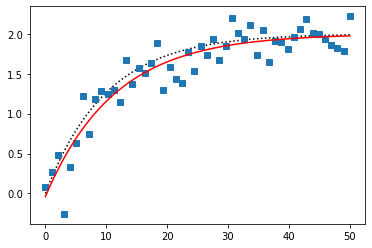

In [15]:
# задаем функцию
def f(t, a, b,k):
    return a-b*np.exp(-k*t)

# строим исходную функцию
t=np.linspace(0,50,200)
plt.plot(t,f(t, 2, 2, 0.1), 'k:', label='original data')

# генерируем шумные данные
t=np.linspace(0,50,50)
ydata = f(t, 2, 2, 0.1) + 0.2*(np.random.randn(len(t)))
plt.plot(t,ydata, 's')


#задаем функцию ошибок
def err_f(x,*args):
    t,ydata = args
    a,b,k =x
    return np.sum((a-b*np.exp(-k*t) - ydata)**2.)




x0=[1,1,1]

res=optimize.minimize(err_f, x0, args=(t, ydata) )
popt=res.x
#рисуем результат
t=np.linspace(0,50,200)
plt.plot(t,f(t, *popt), 'r-', label='optimized data')
plt.show()

## Поиск корней уравнения

Для поиска корней уравнения $f(x)=0$ реализована функция ``scipy.optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, fprime2=None, x0=None, x1=None, xtol=None, rtol=None, maxiter=None, options=None)``

Рассмотрим примеры ее работы:

In [25]:
x2=lambda x: (x-1)*(x+2)
print(optimize.root_scalar(x2, bracket=[0, 3],),end='\n\n')
print(optimize.root_scalar(x2, bracket=[-3, 0],),end='\n\n')
print(optimize.root_scalar(x2, x0=0, x1=-3),end='\n\n')

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.9999999999999816

      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 3
           root: -2.0

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: -1.9999999999999787



## #Экспериментаторы рекомендуют

Для вычета базовой линии использовать алгоритм <a href='https://stackoverflow.com/questions/29156532/python-baseline-correction-library'>Asymmetric Least Squares Baseline correction</a>:

In [ ]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam=4e7, p=0.01, niter=10):
    """Asymmetric Least Squares Baseline correction.
    There are two parameters: 
    p for asymmetry and λ for smoothness. 
    Both have to be tuned to the data at hand. 
    We found that generally 
    0.001 ≤ p ≤ 0.1 is a good choice 
    (for a signal with positive peaks) 
    and 10^2 ≤ λ ≤ 10^9 , 
    but exceptions may occur. 
    In any case one should vary λ on a grid 
    that is approximately linear for log λ
    
    https://stackoverflow.com/questions/29156532/python-baseline-correction-library
    """
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    D = lam * D.dot(D.transpose()) # Precompute this term since it does not depend on `w`
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w) 
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

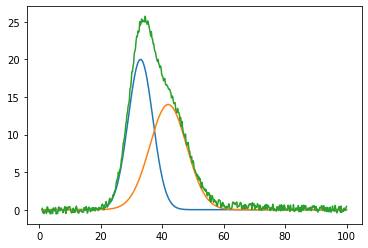